# Principal Component Analysis with Cancer Data

In [15]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [27]:
df = pd.read_csv("Cancer.csv")
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [ ]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.shape

(699, 11)

In [6]:
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [ ]:
# Check for missing value in any other column

In [9]:
df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [11]:
df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# Get count of rows having ?

In [29]:
# We could see "?" values in column, this should be removed from data set
x = df['Bare Nuclei'].value_counts()
x['?']



16

In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

In [ ]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [30]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?',df['Bare Nuclei'].describe().top)

In [31]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           699 non-null    int64
 1   ClumpThickness               699 non-null    int64
 2   Cell Size                    699 non-null    int64
 3   Cell Shape                   699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Bland Chromatin              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [21]:
df.describe(include = 'all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [32]:
df.drop_duplicates(keep ='first', inplace=True)
df.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [23]:
# Check for correlation of variable
df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\harin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


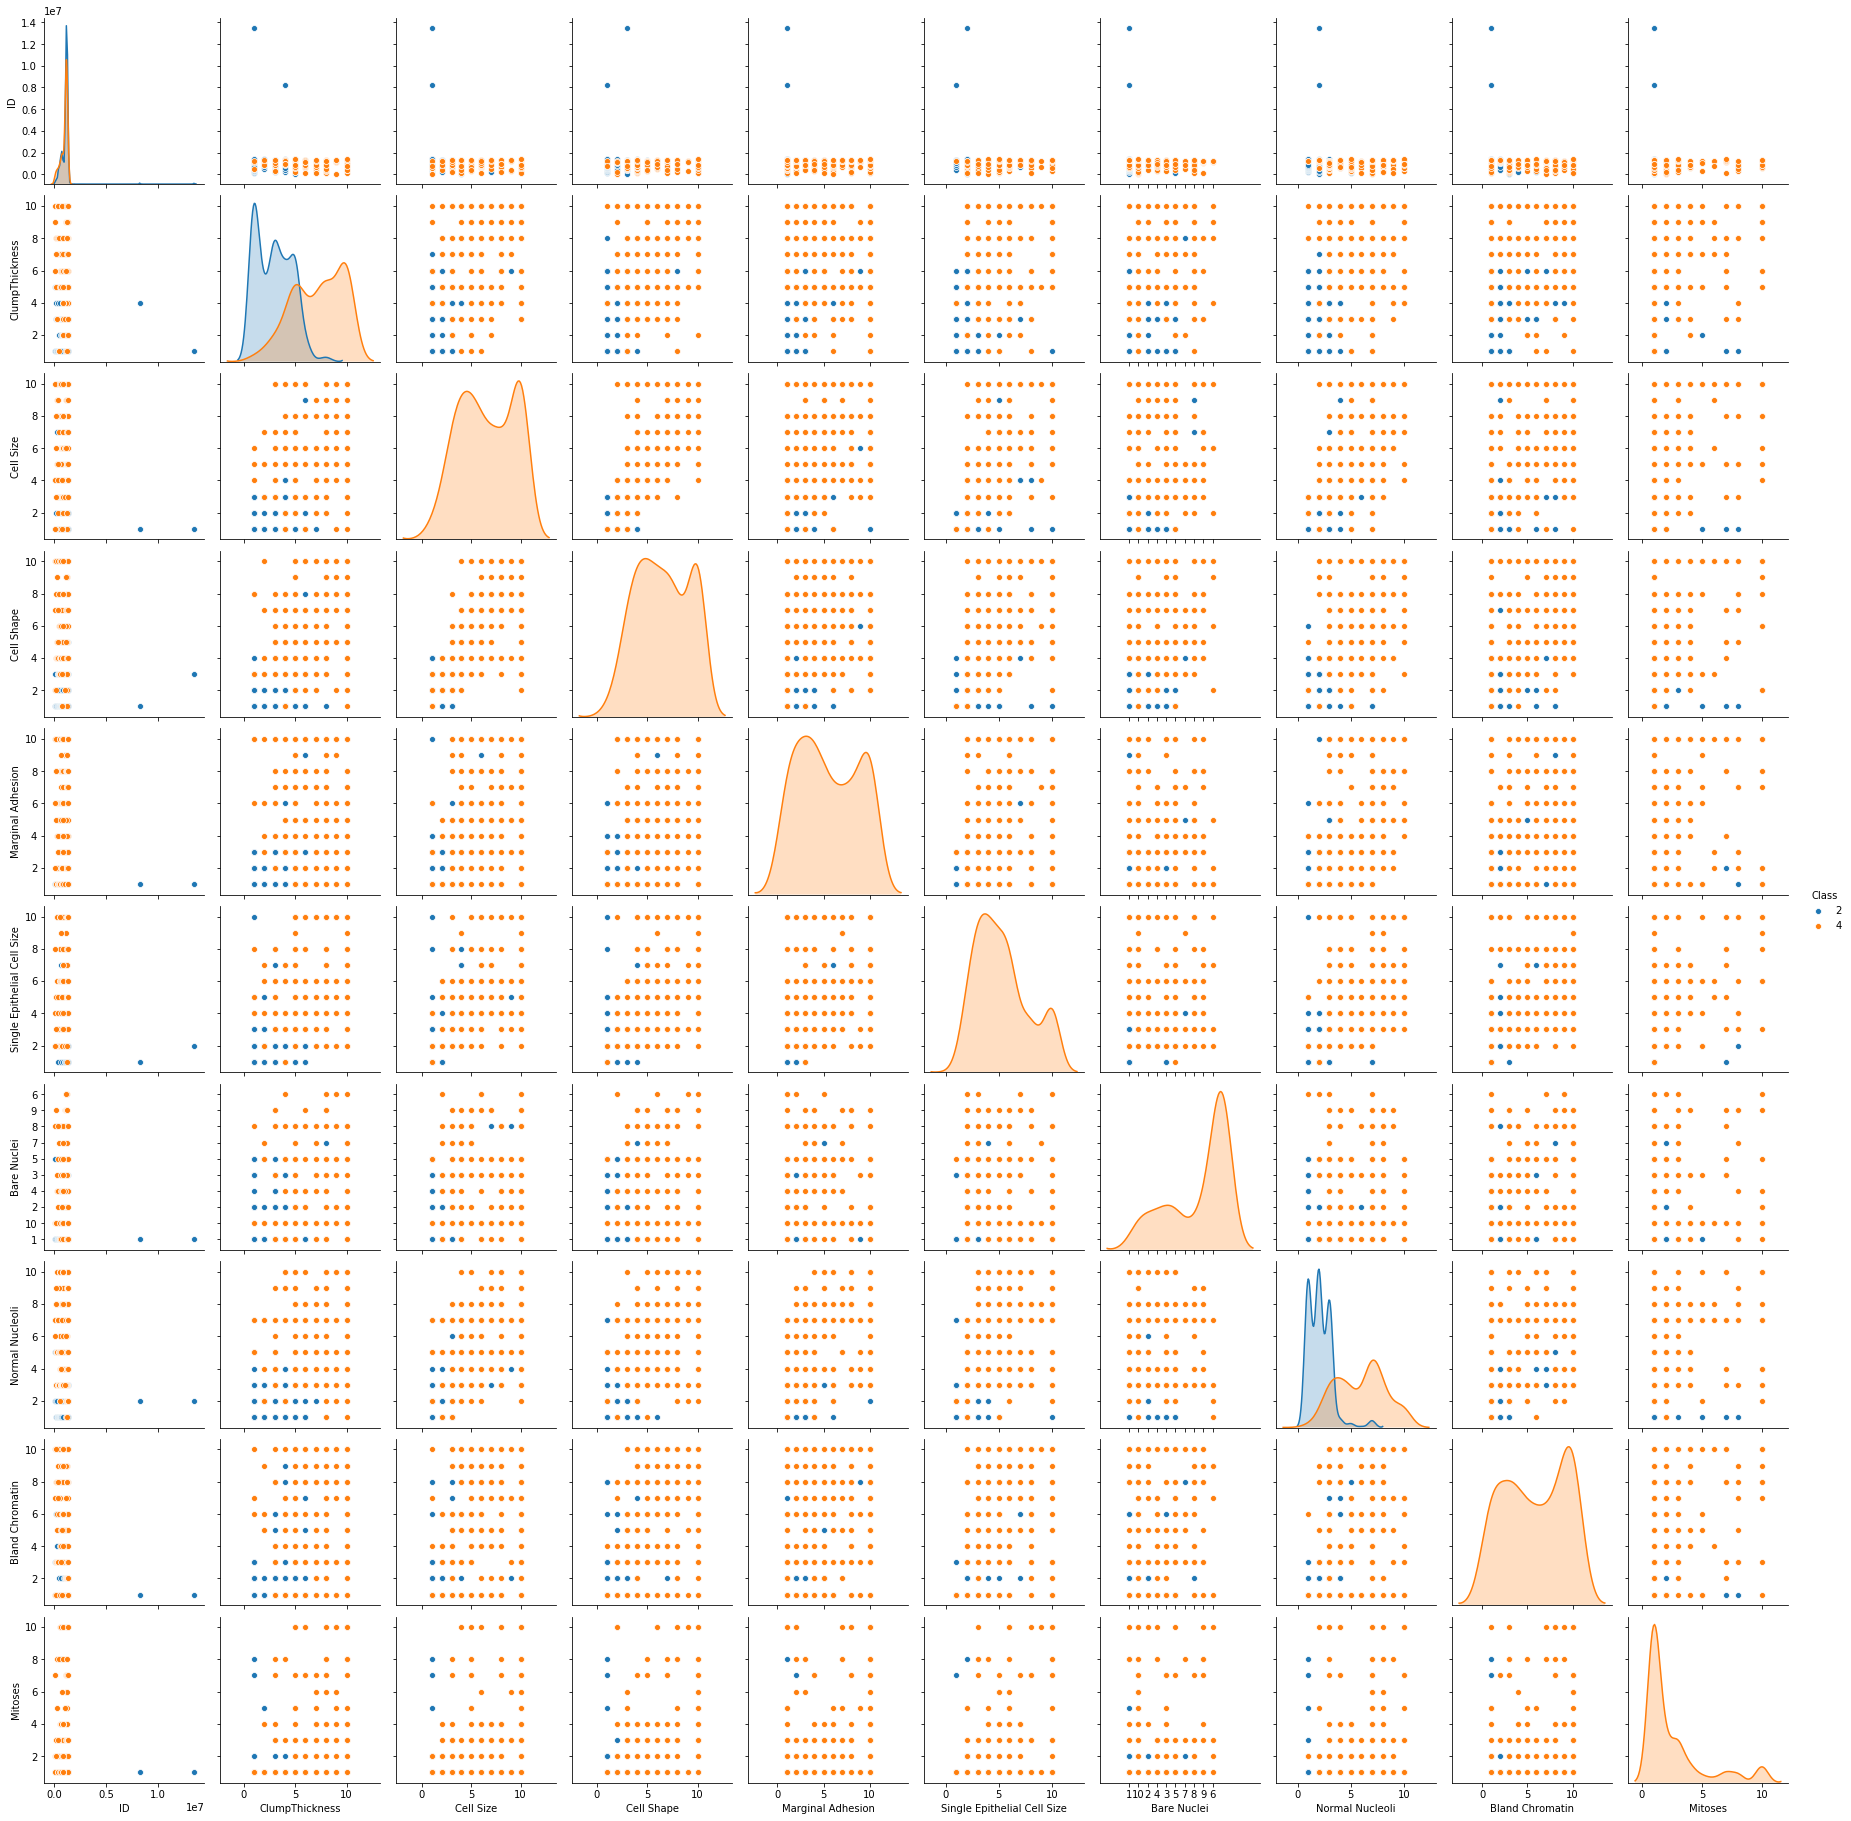

In [5]:
#Let us check for pair plots
sns.pairplot(df , hue='Class' , diag_kind = 'kde')

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
df.drop("ID", axis=1, inplace = True)

In [45]:
df.shape

(690, 10)

In [38]:
df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


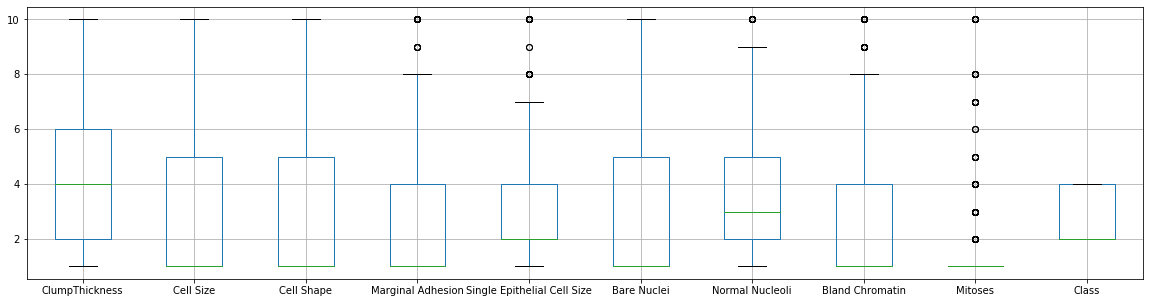

In [39]:
df.boxplot(figsize=(20,5))

In [40]:
pd.crosstab(df['Marginal Adhesion'],df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [41]:
df['Marginal Adhesion'] = np.where(df['Marginal Adhesion'] > 4, 4, df['Marginal Adhesion'])

In [42]:
pd.crosstab(df['Marginal Adhesion'],df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,15,161


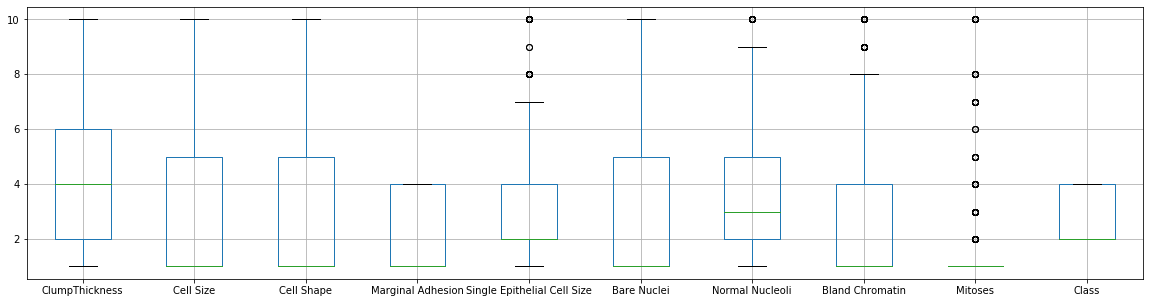

In [43]:
df.boxplot(figsize=(20,5))

In [44]:
pd.crosstab(df['Single Epithelial Cell Size'],df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [46]:
df['Single Epithelial Cell Size'] = np.where(df['Single Epithelial Cell Size'] > 4, 4, df['Single Epithelial Cell Size'])

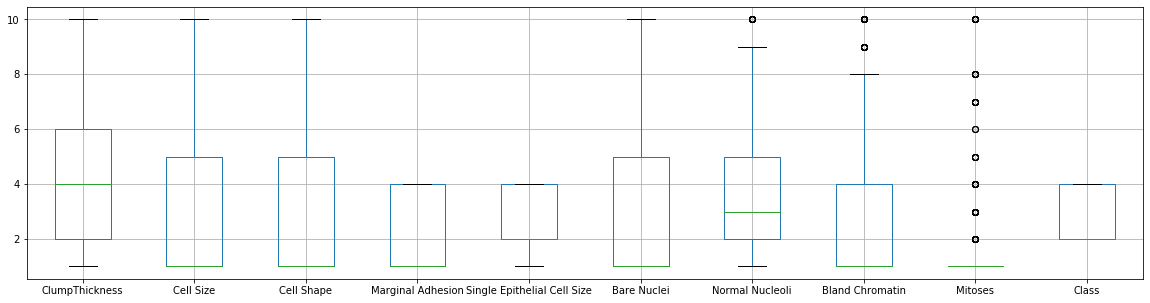

In [47]:
df.boxplot(figsize=(20,5))

In [48]:
pd.crosstab(df['Normal Nucleoli'],df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [49]:
df['Normal Nucleoli'] = np.where(df['Normal Nucleoli'] > 4, 4, df['Normal Nucleoli'])

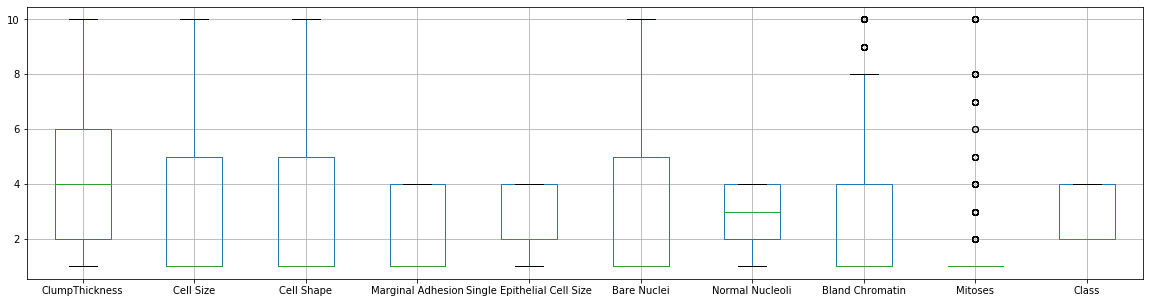

In [50]:
df.boxplot(figsize=(20,5))

In [51]:
pd.crosstab(df['Bland Chromatin'],df['Class'])


Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [52]:
df['Bland Chromatin'] = np.where(df['Bland Chromatin'] > 4, 4, df['Bland Chromatin'])

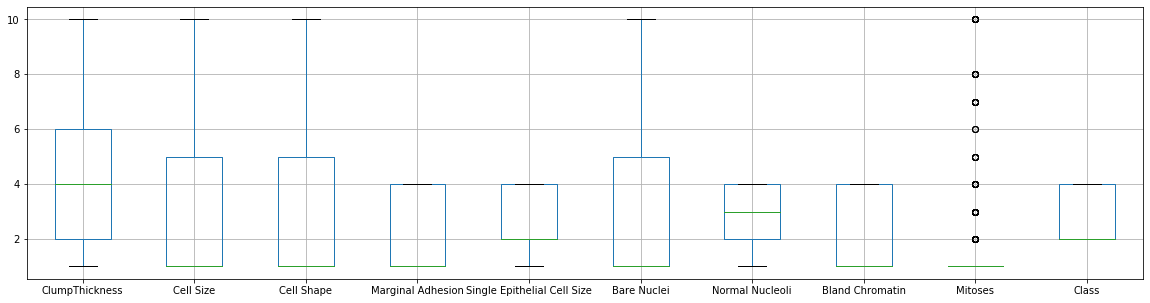

In [53]:
df.boxplot(figsize=(20,5))

In [54]:
pd.crosstab(df['Mitoses'],df['Class'])


Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [55]:
df['Mitoses'] = np.where(df['Mitoses'] > 3, 3, df['Mitoses'])

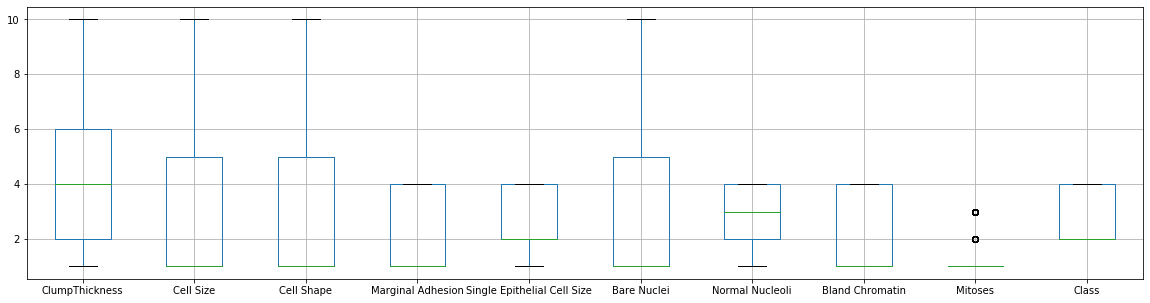

In [56]:
df.boxplot(figsize=(20,5))

In [ ]:
# We could see most of the outliers are now removed.

In [57]:
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.552497,0.583040,0.590648,0.545899,0.571320,0.426836,0.716812
Cell Size,0.643173,1.000000,0.905349,0.721004,0.772087,0.684571,0.668433,0.725792,0.510249,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.703237,0.749581,0.704165,0.657949,0.718065,0.480981,0.817551
Marginal Adhesion,0.552497,0.721004,0.703237,1.000000,0.694505,0.695921,0.603399,0.652313,0.424121,0.739063
Single Epithelial Cell Size,0.583040,0.772087,0.749581,0.694505,1.000000,0.681812,0.634845,0.722559,0.464482,0.770886
Bare Nuclei,0.590648,0.684571,0.704165,0.695921,0.681812,1.000000,0.641447,0.640752,0.451933,0.816655
Normal Nucleoli,0.545899,0.668433,0.657949,0.603399,0.634845,0.641447,1.000000,0.653469,0.378854,0.725450
Bland Chromatin,0.571320,0.725792,0.718065,0.652313,0.722559,0.640752,0.653469,1.000000,0.492406,0.766031
Mitoses,0.426836,0.510249,0.480981,0.424121,0.464482,0.451933,0.378854,0.492406,1.000000,0.521933
Class,0.716812,0.817586,0.817551,0.739063,0.770886,0.816655,0.725450,0.766031,0.521933,1.000000


In [58]:
df.drop("Class", axis=1, inplace = True)

In [59]:
df.shape

(690, 9)

In [60]:
df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,4,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,4,1
4,4,1,1,3,2,1,3,1,1


In [62]:
from scipy.stats import zscore

In [63]:
df = df.apply(zscore)
df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.781803,-0.616796,-0.686858,0.322808,-0.718310,-0.438024
1,0.202823,0.285065,0.268920,1.530101,1.459249,1.803153,0.322808,0.046557,-0.438024
2,-0.507572,-0.701698,-0.745040,-0.781803,-0.616796,-0.410190,0.322808,-0.718310,-0.438024
3,0.558020,1.600748,1.620866,-0.781803,0.421227,0.143146,0.322808,1.576291,-0.438024
4,-0.152375,-0.701698,-0.745040,0.759466,-0.616796,-0.686858,0.322808,-0.718310,-0.438024


# Q6 Create a covariance matrix for identifying Principal components

In [64]:
# PCA
# Step 1 - Create covariance matrix
cov_mtrx = np.cov(df.T)
cov_mtrx

array([[1.00145138, 0.64410677, 0.65453792, 0.55329897, 0.58388619,
        0.59150555, 0.54669109, 0.57214901, 0.42745595],
       [0.64410677, 1.00145138, 0.9066632 , 0.72204998, 0.77320789,
        0.68556472, 0.66940328, 0.72684553, 0.51098944],
       [0.65453792, 0.9066632 , 1.00145138, 0.7042574 , 0.75066888,
        0.70518656, 0.65890363, 0.71910723, 0.48167882],
       [0.55329897, 0.72204998, 0.7042574 , 1.00145138, 0.6955125 ,
        0.69693138, 0.60427482, 0.65326018, 0.42473633],
       [0.58388619, 0.77320789, 0.75066888, 0.6955125 , 1.00145138,
        0.68280195, 0.6357667 , 0.72360753, 0.46515627],
       [0.59150555, 0.68556472, 0.70518656, 0.69693138, 0.68280195,
        1.00145138, 0.64237847, 0.64168219, 0.45258904],
       [0.54669109, 0.66940328, 0.65890363, 0.60427482, 0.6357667 ,
        0.64237847, 1.00145138, 0.65441737, 0.37940435],
       [0.57214901, 0.72684553, 0.71910723, 0.65326018, 0.72360753,
        0.64168219, 0.65441737, 1.00145138, 0.49312095],


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [68]:
eig_vals, eig_vector = np.linalg.eig(cov_mtrx) 

In [69]:
print(eig_vals)

[6.04792928 0.68917013 0.09093497 0.48986979 0.25774747 0.29070405
 0.32157813 0.42354515 0.40158344]


In [70]:
print(eig_vector)

[[ 0.30685038  0.02771442  0.01819884  0.91455544 -0.07693399  0.11079786
  -0.21150379  0.04949763  0.0543418 ]
 [ 0.37029483 -0.04380153  0.72376996 -0.00538681  0.11028163  0.00802951
   0.39017399 -0.28338403 -0.30384608]
 [ 0.36737965 -0.08093297 -0.67827374  0.05257559  0.23957267 -0.09685064
   0.41704388 -0.28558874 -0.2709261 ]
 [ 0.33680133 -0.15635067 -0.04840994 -0.22919283 -0.00389548  0.68855225
  -0.11380673 -0.30484483  0.47670193]
 [ 0.35158052 -0.08618495 -0.06553048 -0.18658806 -0.78287092 -0.28514413
  -0.26576873 -0.19962539 -0.15867127]
 [ 0.33840962 -0.10302527  0.0817668  -0.0533996   0.218368   -0.60911101
   0.04605918  0.09093474  0.66048166]
 [ 0.32114559 -0.24589447 -0.02788451 -0.11308991 -0.1630472   0.21477587
   0.28193821  0.81413994 -0.08836558]
 [ 0.34333043  0.00344093  0.01605687 -0.2125948   0.48287037 -0.03597463
  -0.67401266  0.13724026 -0.35926604]
 [ 0.24734882  0.94223122 -0.03757184 -0.11230887 -0.06472429  0.06654972
   0.09806196  0.11390

# Q8 Find variance and cumulative variance by each eigen vector

In [71]:
tot =sum(eig_vals)
tot

9.013062409288825

In [72]:
var_explained = [(i/tot)*100 for i in sorted(eig_vals, reverse = True)] 
var_explained

[67.1018240325258,
 7.64634811126865,
 5.435109267691104,
 4.699236852495155,
 4.455571475411545,
 3.567911980369607,
 3.225363810432446,
 2.8597102104040832,
 1.008924259401629]

In [74]:
cum_var_explained = np.cumsum(var_explained)

In [75]:
cum_var_explained

array([ 67.10182403,  74.74817214,  80.18328141,  84.88251826,
        89.33808974,  92.90600172,  96.13136553,  98.99107574,
       100.        ])

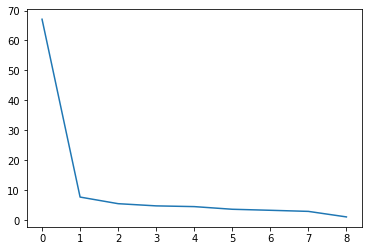

In [76]:
plt.plot(var_explained)

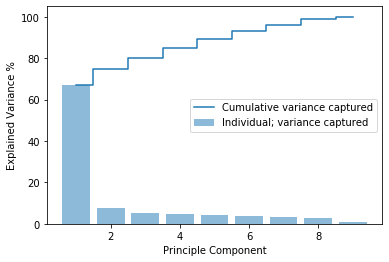

In [86]:
plt.bar(range(1,eig_vals.size+1), var_explained, alpha =0.5 , align = 'center', label = 'Individual; variance captured')
plt.step(range(1,eig_vals.size+1), cum_var_explained, where='mid', label = 'Cumulative variance captured')
plt.ylabel('Explained Variance %')
plt.xlabel('Principle Component')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [87]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=7)
data_reduced = pca.fit_transform(df)
data_reduced

array([[-1.4352106 , -0.15175582, -0.64644685, ...,  0.10617444,
         0.12607548, -0.21095364],
       [ 1.91648566, -1.07133406,  0.51836855, ..., -1.46178984,
        -0.28175016,  0.42363989],
       [-1.55956844, -0.19994778,  0.01802253, ..., -0.03795549,
         0.28906977,  0.03627804],
       ...,
       [ 3.65354913,  0.18973634,  0.73432622, ...,  1.8479053 ,
         0.69565446, -0.27796564],
       [ 2.42424779, -1.14424905,  0.95721379, ...,  0.69949347,
         0.00520052, -0.92326943],
       [ 3.13116206, -1.31692325,  1.13013066, ...,  0.86460247,
         0.02398012, -0.39329355]])

In [91]:
pca.components_

array([[ 0.30685038,  0.37029483,  0.36737965,  0.33680133,  0.35158052,
         0.33840962,  0.32114559,  0.34333043,  0.24734882],
       [ 0.02771442, -0.04380153, -0.08093297, -0.15635067, -0.08618495,
        -0.10302527, -0.24589447,  0.00344093,  0.94223122],
       [-0.91455544,  0.00538681, -0.05257559,  0.22919283,  0.18658806,
         0.0533996 ,  0.11308991,  0.2125948 ,  0.11230887],
       [ 0.04949763, -0.28338403, -0.28558874, -0.30484483, -0.19962539,
         0.09093474,  0.81413994,  0.13724026,  0.11390353],
       [-0.0543418 ,  0.30384608,  0.2709261 , -0.47670193,  0.15867127,
        -0.66048166,  0.08836558,  0.35926604, -0.07606378],
       [-0.21150379,  0.39017399,  0.41704388, -0.11380673, -0.26576873,
         0.04605918,  0.28193821, -0.67401266,  0.09806196],
       [-0.11079786, -0.00802951,  0.09685064, -0.68855225,  0.28514413,
         0.60911101, -0.21477587,  0.03597463, -0.06654972]])

# Q10 Find correlation between components and features

In [92]:
df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

In [94]:
col = ['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses']

In [95]:
df_comp = pd.DataFrame(pca.components_,columns= col)
df_comp

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.306850,0.370295,0.367380,0.336801,0.351581,0.338410,0.321146,0.343330,0.247349
1,0.027714,-0.043802,-0.080933,-0.156351,-0.086185,-0.103025,-0.245894,0.003441,0.942231
2,-0.914555,0.005387,-0.052576,0.229193,0.186588,0.053400,0.113090,0.212595,0.112309
3,0.049498,-0.283384,-0.285589,-0.304845,-0.199625,0.090935,0.814140,0.137240,0.113904
4,-0.054342,0.303846,0.270926,-0.476702,0.158671,-0.660482,0.088366,0.359266,-0.076064
5,-0.211504,0.390174,0.417044,-0.113807,-0.265769,0.046059,0.281938,-0.674013,0.098062
6,-0.110798,-0.008030,0.096851,-0.688552,0.285144,0.609111,-0.214776,0.035975,-0.066550


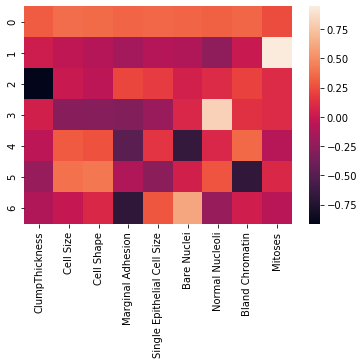

In [96]:
sns.heatmap(df_comp)